PARKINSON MODEL

In [1]:
from pandas import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import xgboost as xgb
import pickle
import warnings
warnings.filterwarnings("ignore")

In [34]:
# Load the dataset
# Replace 'heart.csv' with the path to your dataset
data =read_csv('/content/sample_data/parkinsons.csv')
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [35]:
data.shape

(195, 24)

In [36]:
data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [37]:
data.status.value_counts()

,count
status,
1,147
0,48


In [38]:
# Separate features (X) and target (y)
# Assuming 'target' is the column indicating heart disease presence (0 or 1)
X = data.drop(columns=['name','status'], axis=1)
y = data['status']

In [39]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

balancing the dataset

In [41]:
smote=SMOTE()
x_train_resemble,y_train_resemble=smote.fit_resample(x_train,y_train)

In [42]:
scaler=StandardScaler()
x_train_scaler=scaler.fit_transform(x_train_resemble)
x_test_scaler=scaler.transform(x_test)


In [43]:
with open('/content/sample_data/scaler_of_parkinsons.pkl', 'wb') as file:
    pickle.dump(scaler, file)

logistic regression

In [44]:
# Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scaler, y_train_resemble)




LogisticRegression()

In [45]:
# Predict
y_pred = model.predict(x_test_scaler)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7692307692307693
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.92      0.76      0.83        29

    accuracy                           0.77        39
   macro avg       0.72      0.78      0.74        39
weighted avg       0.82      0.77      0.78        39

Confusion Matrix:
 [[ 8  2]
 [ 7 22]]


xgboost

In [46]:
# Create the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,      # Number of trees
    learning_rate=0.1,     # Step size for weight updates
    max_depth=5,           # Maximum depth of each tree
    subsample=0.8,         # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for training each tree
    random_state=42        # Random seed for reproducibility
)

In [47]:
# Training the model
xgb_model.fit(x_train_scaler, y_train_resemble)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [48]:
# Make predictions
y_pred = xgb_model.predict(x_test_scaler)

In [49]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



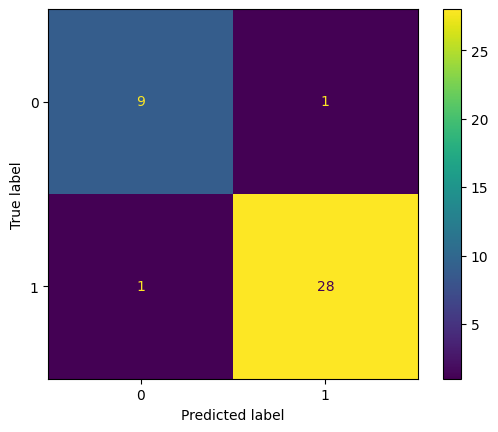

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = xgb_model.predict(x_test_scaler)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [51]:
cm

array([[ 9,  1],
       [ 1, 28]])

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

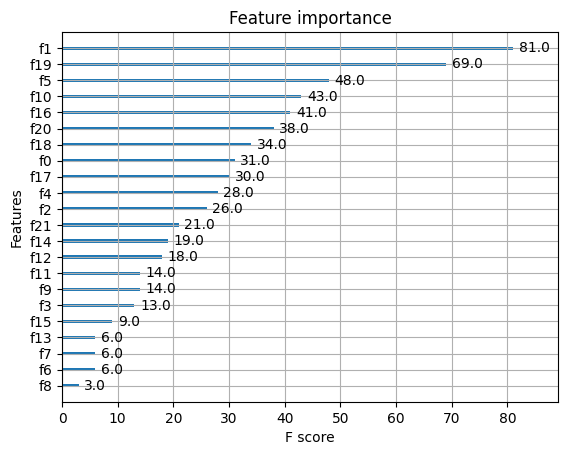

In [52]:
xgb.plot_importance(xgb_model)

In [53]:
x_train_prediction=xgb_model.predict(x_train_scaler)
training_score=accuracy_score(x_train_prediction,y_train_resemble)
print('accuraccy of model on train data set:%.2f'%training_score)

accuraccy of model on train data set:1.00


In [54]:
file_name='/content/sample_data/parkinson_model.pk1'
pickle.dump(xgb_model,open(file_name,'wb'))

In [ ]:
file

<_io.BufferedWriter name='/content/sample_data/scaler_of_parkinsons.pkl'>

In [ ]:
model=pickle.load(open(file_name,'rb'))

In [ ]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


HEART MODEL

In [2]:
diabetes_data=read_csv('/content/sample_data/diabetes_012_health_indicators_BRFSS2015.csv')
diabetes_data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70172,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,4.0,8.0
70173,2.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,0.0,0.0,0.0,0.0,8.0,6.0,7.0
70174,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,8.0,5.0,2.0
70175,0.0,1.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,6.0,0.0,0.0,0.0,9.0,5.0,8.0


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70177 entries, 0 to 70176
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_012          70177 non-null  float64
 1   HighBP                70177 non-null  float64
 2   HighChol              70177 non-null  float64
 3   CholCheck             70177 non-null  float64
 4   BMI                   70177 non-null  float64
 5   Smoker                70177 non-null  float64
 6   Stroke                70177 non-null  float64
 7   HeartDiseaseorAttack  70177 non-null  float64
 8   PhysActivity          70177 non-null  float64
 9   Fruits                70177 non-null  float64
 10  Veggies               70177 non-null  float64
 11  HvyAlcoholConsump     70177 non-null  float64
 12  AnyHealthcare         70177 non-null  float64
 13  NoDocbcCost           70177 non-null  float64
 14  GenHlth               70177 non-null  float64
 15  MentHlth           

In [4]:
diabetes_data.shape

(70177, 22)

In [5]:
diabetes_data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
diabetes_data.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70172,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,4.0,8.0
70173,2.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,0.0,0.0,0.0,0.0,8.0,6.0,7.0
70174,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,8.0,5.0,2.0
70175,0.0,1.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,6.0,0.0,0.0,0.0,9.0,5.0,8.0
70176,2.0,1.0,1.0,1.0,32.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,4.0,30.0,21.0,0.0,1.0,10.0,6.0,NaN


In [7]:
diabetes_data.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [8]:
diabetes_data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70177.000000,70177.000000,70177.000000,70177.000000,70177.000000,70177.000000,70177.000000,70177.000000,70177.000000,70177.000000,...,70177.000000,70177.000000,70177.000000,70177.000000,70177.000000,70177.000000,70177.000000,70177.000000,70177.000000,70176.000000
mean,0.294740,0.427191,0.426479,0.962865,28.023284,0.440386,0.040954,0.091440,0.769697,0.641435,...,0.949513,0.084444,2.497955,3.169001,4.231515,0.163914,0.441954,8.119754,5.075609,6.092938
std,0.694783,0.494674,0.494569,0.189093,6.138095,0.496437,0.198184,0.288236,0.421030,0.479582,...,0.218948,0.278054,1.073321,7.332107,8.664416,0.370200,0.496623,3.080509,0.993616,2.070072
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
diabetes_data.rename(columns={'Diabetes_012':"diabetes"},inplace=True)

In [10]:
diabetes_data['diabetes'].value_counts()

,count
diabetes,
0.0,59137
2.0,9644
1.0,1396


<Axes: xlabel='BMI'>

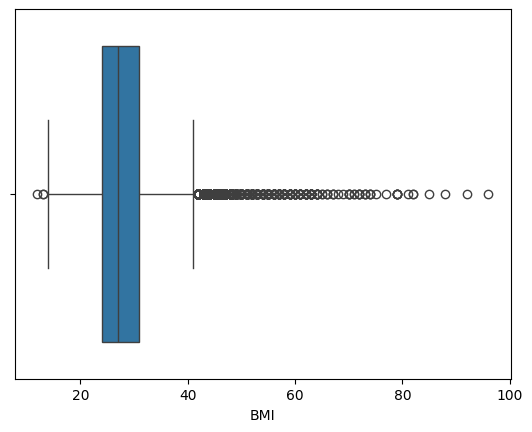

In [11]:
import seaborn as sns
sns.boxplot(x=diabetes_data['BMI'])

In [12]:
q1=diabetes_data['BMI'].quantile(0.25)
q3=diabetes_data['BMI'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print(lower_limit,upper_limit)

13.5 41.5


In [13]:
diabetes_data_clean = diabetes_data[(diabetes_data['BMI'] >= lower_limit) & (diabetes_data['BMI'] <= upper_limit)]

In [14]:
diabetes_data_clean.head(5)

,diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [15]:
x=diabetes_data_clean.drop(columns='diabetes',axis=1)
print(x.head())
y=diabetes_data_clean['diabetes']
print(y.head())

   HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0           0.0     0.0      1.0  ...            1.0          0.0      5.0   
1           1.0     0.0      0.0  ...            0.0          1.0      3.0   
2           0.0     1.0      0.0  ...            1.0          1.0      5.0   
3           1.0     1.0      1.0  ...            1.0          0.0      2.0   
4           1.0     1.0      1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income 

spliiting data into train and test

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train,x_test,y_train,y_test)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
58446     1.0       1.0        1.0  26.0     1.0     1.0   
33347     0.0       0.0        1.0  27.0     1.0     0.0   
53685     0.0       0.0        1.0  19.0     0.0     0.0   
19684     0.0       0.0        1.0  34.0     1.0     0.0   
41700     1.0       1.0        1.0  30.0     0.0     0.0   
...       ...       ...        ...   ...     ...     ...   
55769     0.0       0.0        1.0  34.0     1.0     0.0   
45837     1.0       1.0        1.0  30.0     1.0     1.0   
35042     0.0       0.0        1.0  25.0     0.0     0.0   
32113     1.0       0.0        1.0  31.0     1.0     0.0   
46124     1.0       1.0        1.0  39.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
58446                   0.0           1.0     1.0      1.0  ...   
33347                   0.0           1.0     1.0      1.0  ...   
53685                   0.0           1.0     1.0      1.0  ...   
19684      

In [ ]:
# Fill missing values in the Income column with the mean
x_train['Income'].fillna(x_train['Income'].mean(), inplace=True)
x_test['Income'].fillna(x_test['Income'].mean(), inplace=True)

# Reapply SMOTE
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)

In [17]:
from imblearn.over_sampling import SMOTE

In [20]:
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)

In [21]:
y_train.value_counts()

,count
diabetes,
0.0,46105
2.0,46105
1.0,46105


In [22]:
standard_scaler=StandardScaler()
x_train_standard=standard_scaler.fit_transform(x_train)
x_test_standard=standard_scaler.transform(x_test)

In [23]:
with open('/content/sample_data/scaler_of_diabetes.pk1','wb') as f:
  pickle.dump(standard_scaler,f)

xgboost

In [24]:
# Create the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,      # Number of trees
    learning_rate=0.1,     # Step size for weight updates
    max_depth=5,           # Maximum depth of each tree
    subsample=0.8,         # Fraction of samples used for training each tree
    colsample_bytree=0.8,  # Fraction of features used for training each tree
    random_state=42        # Random seed for reproducibility
)

In [25]:
# Train the model
xgb_model.fit(x_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
# Make predictions
y_pred = xgb_model.predict(x_test)

Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     11532
         1.0       0.00      0.00      0.00       270
         2.0       0.42      0.31      0.36      1744

    accuracy                           0.84     13546
   macro avg       0.44      0.42      0.42     13546
weighted avg       0.81      0.84      0.82     13546



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

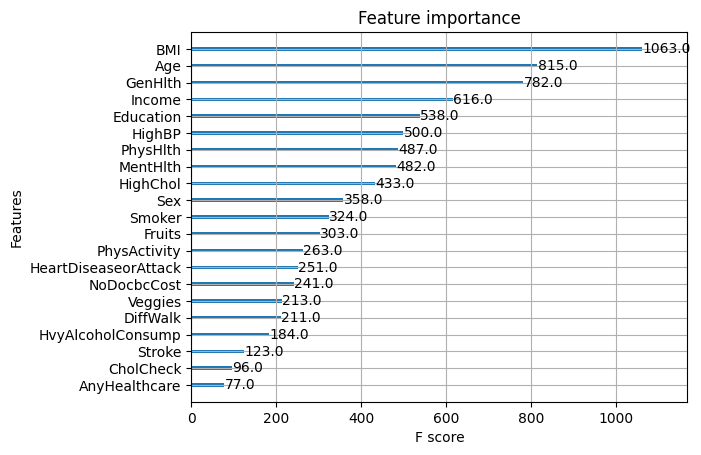

In [27]:
# Evaluate the model
accuracy_of_xgb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_of_xgb:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance (optional)
xgb.plot_importance(xgb_model)

logistic regression

In [29]:
# Use multinomial logistic regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [30]:
y_pred = logistic_model.predict(x_test)

accuracy_of_logistic = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_of_logistic:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.65      0.78     11532
         1.0       0.03      0.28      0.05       270
         2.0       0.33      0.60      0.42      1744

    accuracy                           0.64     13546
   macro avg       0.44      0.51      0.42     13546
weighted avg       0.86      0.64      0.72     13546



random classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

random_classifier_model = RandomForestClassifier(random_state=42)
random_classifier_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = random_classifier_model.predict(x_test)

accuracy_of_classifier= accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_of_classifier:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.92     11532
         1.0       0.08      0.00      0.01       270
         2.0       0.45      0.20      0.28      1744

    accuracy                           0.85     13546
   macro avg       0.47      0.39      0.40     13546
weighted avg       0.80      0.85      0.82     13546



ANN

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.2 MB/s eta 0:00:00


In [ ]:
x_train.shape

(498201, 21)

In [ ]:
import keras_tuner as kt

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense,Dropout

def build_model(hp):
    model3 = Sequential()
    model3.add(Input(shape=(21,)))  # Input layer

    num_layers = hp.Int('num_layers', min_value=1, max_value=10)
    print(f"Number of layers selected in this trial: {num_layers}")

    for i in range(num_layers):
        model3.add(Dense(
            hp.Int(f'units_{i}', min_value=64, max_value=512, step=64),
            activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'sigmoid', 'elu', 'selu'])
        ))
        model3.add(Dropout(hp.Float(f'dropout_{i}', 0.0, 0.5, step=0.1)))

    model3.add(Dense(3, activation='softmax'))
    model3.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'adamax', 'adadelta']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model3


In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='tuner_dir',
    project_name='trial_3')

Number of layers selected in this trial: 1


In [ ]:
'''# One-hot encode the target variable
y_train_encoded = keras.utils.to_categorical(y_train)
y_test_encoded = keras.utils.to_categorical(y_test)

tuner.search(x_train, y_train_encoded, epochs=5, validation_data=(x_test, y_test_encoded))'''

tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 06m 16s]
val_accuracy: 0.5818073749542236

Best val_accuracy So Far: 0.8498985171318054
Total elapsed time: 00h 30m 46s


In [ ]:
model4=tuner.get_best_models(num_models=1)[0]

Number of layers selected in this trial: 7


In [ ]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 384)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 384)            │       147,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 192)            │        73,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 320)            │        61,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 432,131 (1.65 MB)

 Trainable params: 432,131 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stoping=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
history=model4.fit(x_train_standard,y_train,epochs=100,validation_data=(x_test_standard,y_test),callbacks=[early_stoping])

Epoch 1/100


FailedPreconditionError: Graph execution error:

Detected at node adam/Sub_10/ReadVariableOp defined at (most recent call last):
<stack traces unavailable>
Read variable failure adam/sequential_dense_1_kernel_momentum/874. It could mean the variable is uninitialized or the variable is on another device 
	 [[{{node adam/Sub_10/ReadVariableOp}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_4927675[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_multi_step_on_iterator_4927802]

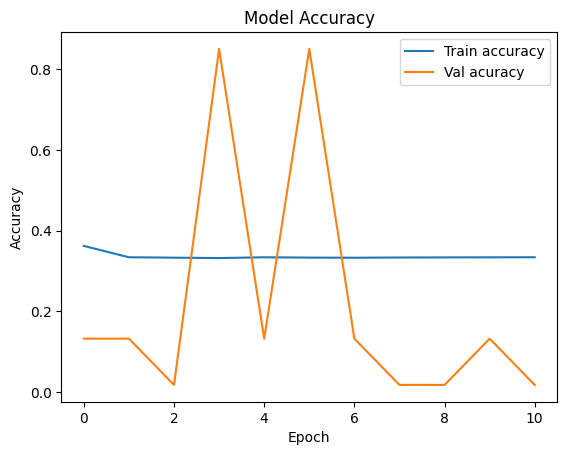

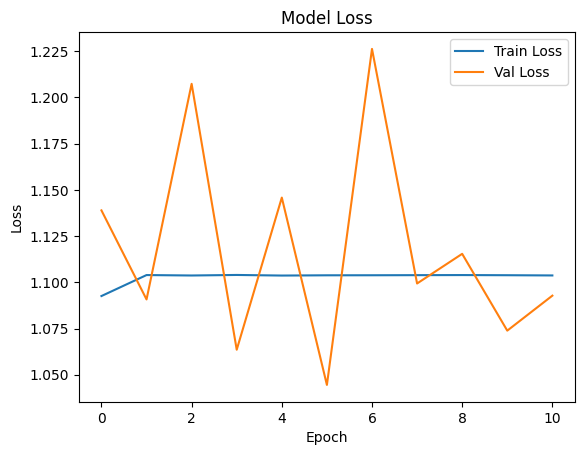

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val acuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
file_name='D:\disease prediction\heart.sav'
pickle.dump(model,open(file_name,'wb'))

In [ ]:
a=pickle.load(open(file_name,'rb'))
print(a)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [33]:
with open('/content/sample_data/diabetes_model.pk1','wb') as f:
  pickle.dump(random_classifier_model,f)

DIABETES MODEL

In [19]:
# Fill missing values in the Income column with the mean
x_train['Income'].fillna(x_train['Income'].mean(), inplace=True)
x_test['Income'].fillna(x_test['Income'].mean(), inplace=True)

# Reapply SMOTE
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)